In [26]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Basic Convolutional NN example in PyTorch

In [4]:
# Define the Hyperparameters
# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

In [5]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

In [7]:
train_dataset.train_data.shape

torch.Size([60000, 28, 28])

In [19]:
class CNN(nn.Module):
    def __init__(self,num_classes=10):
        
        # Xavier Initiliazation
        def init_weights(m):
            if type(m) == nn.Linear:
                nn.init.xavier_uniform(m.weight)
                m.bias.data.fill_(0.01)
                
        super(CNN,self).__init__()
        self.layer1 = nn.Sequential(
        nn.Conv2d(1,16,kernel_size=5, stride=1, padding=2),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer1.apply(init_weights)
        
        self.layer2 = nn.Sequential(
        nn.Conv2d(16,32,kernel_size=5, stride=1, padding=2),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer2.apply(init_weights)
        
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out    

In [20]:
model = CNN(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [21]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 1.8319
Epoch [1/5], Step [200/600], Loss: 1.4191
Epoch [1/5], Step [300/600], Loss: 1.2647
Epoch [1/5], Step [400/600], Loss: 0.8724
Epoch [1/5], Step [500/600], Loss: 0.8506
Epoch [1/5], Step [600/600], Loss: 0.7231
Epoch [2/5], Step [100/600], Loss: 0.6254
Epoch [2/5], Step [200/600], Loss: 0.5411
Epoch [2/5], Step [300/600], Loss: 0.4649
Epoch [2/5], Step [400/600], Loss: 0.4187
Epoch [2/5], Step [500/600], Loss: 0.3298
Epoch [2/5], Step [600/600], Loss: 0.4374
Epoch [3/5], Step [100/600], Loss: 0.3325
Epoch [3/5], Step [200/600], Loss: 0.4181
Epoch [3/5], Step [300/600], Loss: 0.3124
Epoch [3/5], Step [400/600], Loss: 0.2670
Epoch [3/5], Step [500/600], Loss: 0.2630
Epoch [3/5], Step [600/600], Loss: 0.2661
Epoch [4/5], Step [100/600], Loss: 0.3064
Epoch [4/5], Step [200/600], Loss: 0.2475
Epoch [4/5], Step [300/600], Loss: 0.2625
Epoch [4/5], Step [400/600], Loss: 0.2618
Epoch [4/5], Step [500/600], Loss: 0.2332
Epoch [4/5], Step [600/600], Loss:

In [22]:
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 95.77 %


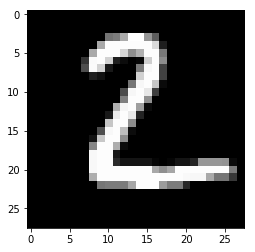

In [33]:
plt.imshow(test_loader.dataset.test_data[1],cmap = 'gray')

In [46]:
# Code to fetch one batch of data
with torch.no_grad():
    batch_sample = next(iter(test_loader))[0]
    outputs = model(batch_sample)
    _, predicted = torch.max(outputs.data, 1)

In [49]:
predicted[1].item()

2